In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Memuat Dataset ---

In [ ]:
try:
    df = pd.read_csv('insurance.csv')
    print("Dataset berhasil dimuat!")
    print(df.head())
    print("\nInformasi Dataset:")
    df.info()
except FileNotFoundError:
    print("Error: File 'insurance.csv' tidak ditemukan.")
    print("Link Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance")
    exit() # Keluar dari script jika file tidak ditemukan

Dataset berhasil dimuat!
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# --- 2. Preprocessing Data ---

Mengatasi variabel kategorikal: 'sex', 'smoker', 'region'
Menggunakan One-Hot Encoding karena Decision Tree bisa menanganinya dengan baik
dan menghindari asumsi urutan pada kategori.

In [3]:
print("\nMelakukan One-Hot Encoding untuk variabel kategorikal...")
df_processed = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
# drop_first=True untuk menghindari multicollinearity (dummy variable trap)

print("\nDataset setelah One-Hot Encoding:")
print(df_processed.head())
print(f"Jumlah kolom setelah encoding: {df_processed.shape[1]}")


Melakukan One-Hot Encoding untuk variabel kategorikal...

Dataset setelah One-Hot Encoding:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  
Jumlah kolom setelah encoding: 9


# --- 3. Memisahkan Fitur (X) dan Target (y) ---

In [4]:
X = df_processed.drop('charges', axis=1) # Fitur adalah semua kolom kecuali 'charges'
y = df_processed['charges']              # Target adalah kolom 'charges'

print(f"\nUkuran Fitur (X): {X.shape}")
print(f"Ukuran Target (y): {y.shape}")


Ukuran Fitur (X): (1338, 8)
Ukuran Target (y): (1338,)


# --- 4. Membagi Dataset menjadi Data Latih dan Data Uji ---
test_size=0.2 berarti 20% data akan digunakan sebagai data uji

random_state=42 untuk konsistensi hasil

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nUkuran data latih (X_train): {X_train.shape}")
print(f"Ukuran data uji (X_test): {X_test.shape}")


Ukuran data latih (X_train): (1070, 8)
Ukuran data uji (X_test): (268, 8)


# --- 5. Membuat dan Melatih Model Decision Tree Regressor ---
Untuk regresi, gunakan DecisionTreeRegressor

max_depth dapat diatur untuk mengontrol kompleksitas pohon

Cobalah bereksperimen dengan nilai max_depth yang berbeda (misal: 3, 5, 7, 10)

Pohon yang terlalu dalam bisa menyebabkan overfitting.

In [ ]:
model = DecisionTreeRegressor(random_state=42, max_depth=5) # Contoh: max_depth=5
model.fit(X_train, y_train)

print("\nModel Decision Tree Regressor berhasil dilatih!")


Model Decision Tree Regressor berhasil dilatih!


# --- 6. Melakukan Prediksi ---

In [18]:
y_pred = model.predict(X_test)
print(y_pred[:5]) # Menampilkan 5 prediksi pertama

[10550.64043734  5243.04129723 26871.09152294 10550.64043734
 34232.77860769]


# --- 7. Mengevaluasi Model ---

In [8]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

In [9]:
print(f"\nEvaluasi Model Decision Tree Regressor:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")


Evaluasi Model Decision Tree Regressor:
Mean Absolute Error (MAE): 2930.77
Mean Squared Error (MSE): 25831862.60
Root Mean Squared Error (RMSE): 5082.51
R-squared (R2): 0.8336


# --- 8. Visualisasi Prediksi vs Aktual ---

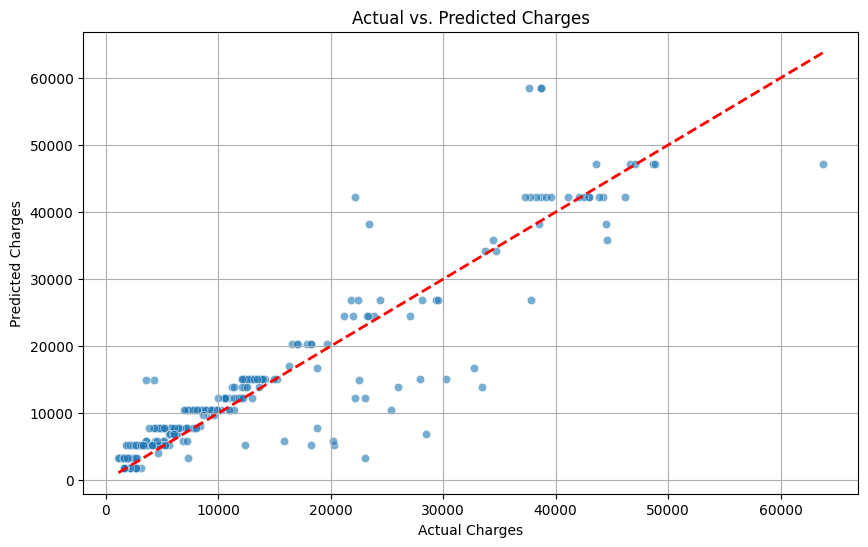

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Garis y=x
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.grid(True)
plt.show()

# --- 9. Visualisasi Decision Tree (Untuk pemahaman) ---

Visualisasi Decision Tree bisa sangat besar.

Jika pohon terlalu dalam (max_depth besar), visualisasi bisa jadi tidak terbaca.

Batasi max_depth saat plot_tree untuk visualisasi yang lebih baik.

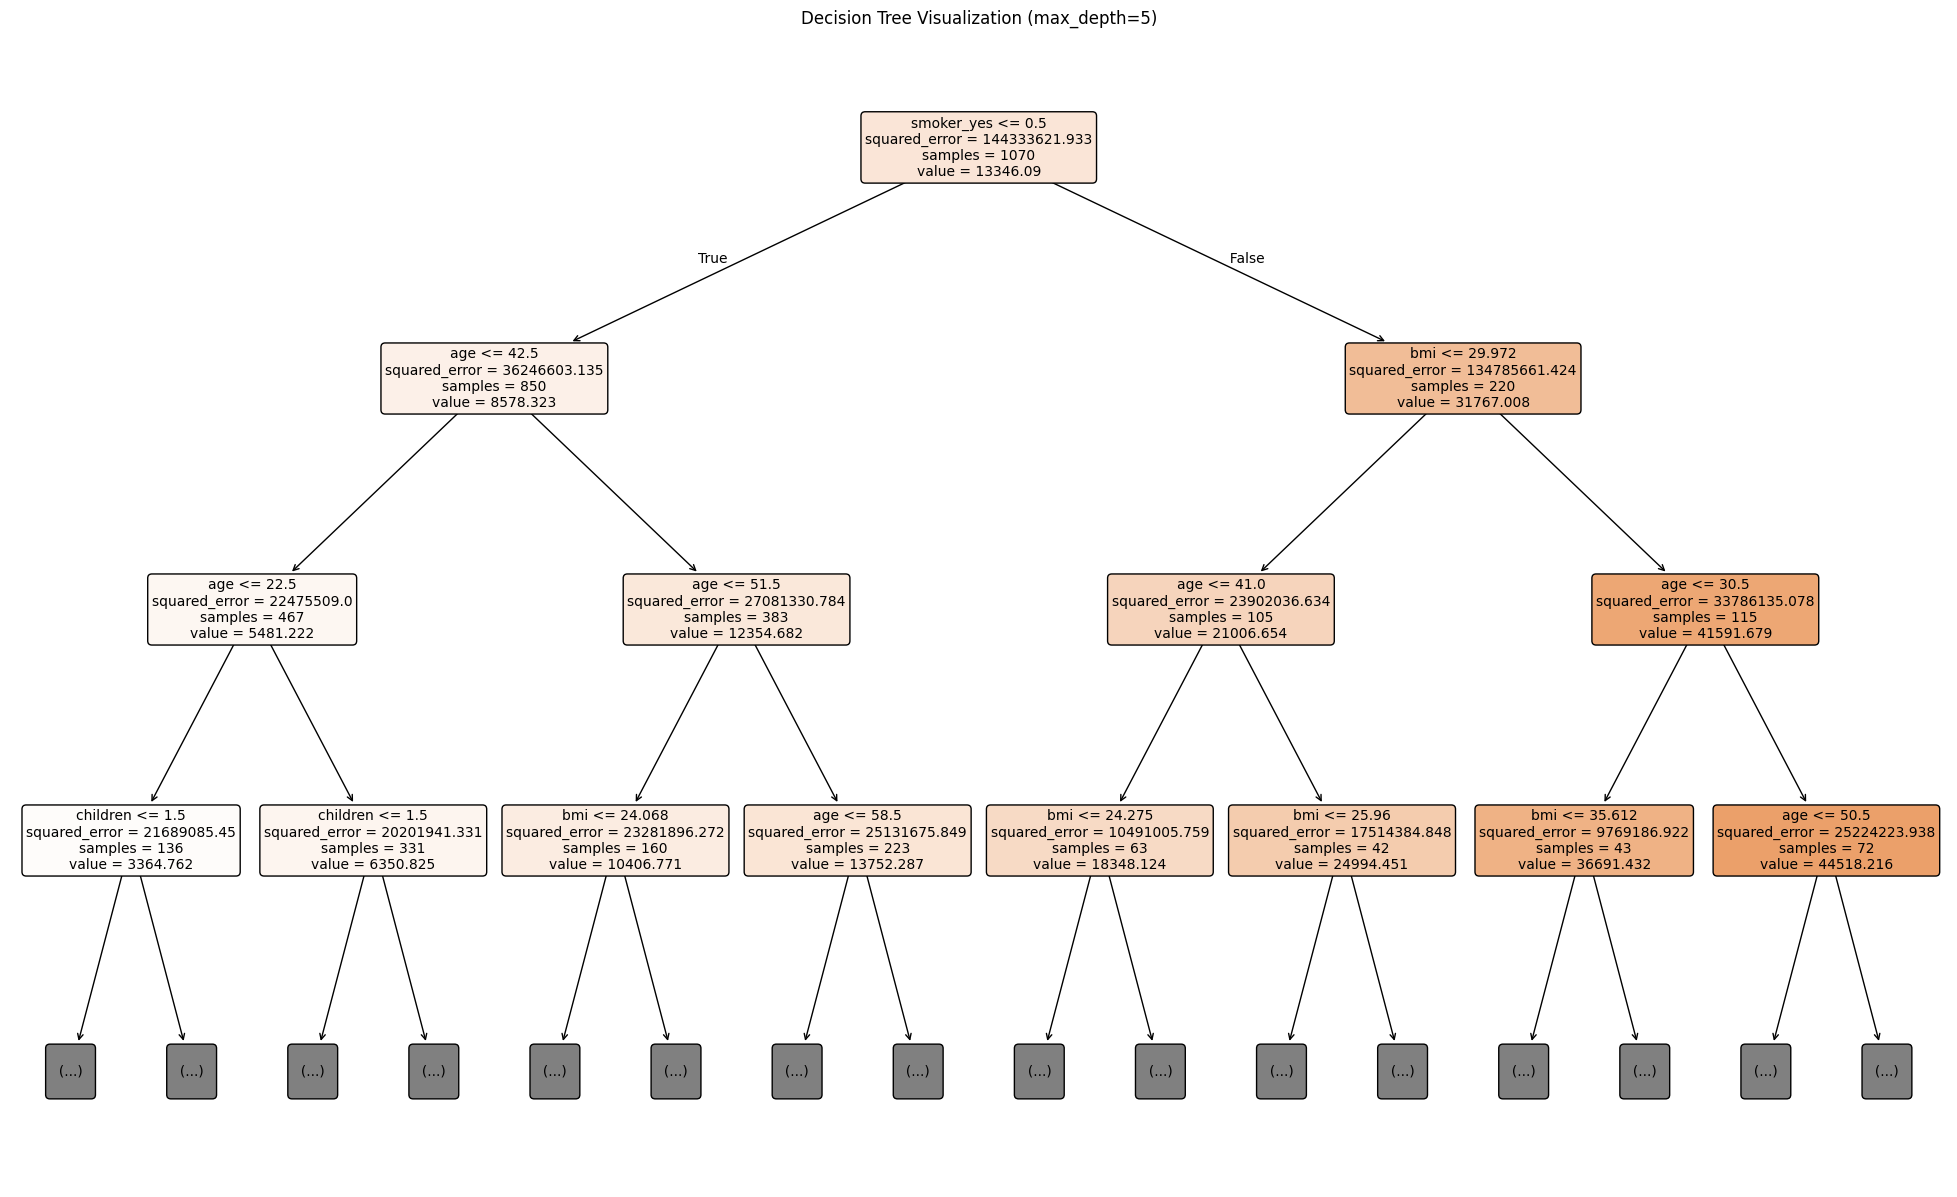

In [11]:
plt.figure(figsize=(25, 15))
plot_tree(model,
          feature_names=X.columns.tolist(), # Nama fitur dari DataFrame X
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3 # Batasi kedalaman untuk visualisasi agar tidak terlalu ramai
         )
plt.title(f'Decision Tree Visualization (max_depth={model.max_depth})')
plt.show()

# --- 10. Contoh Prediksi untuk Data Baru (Opsional) ---

Buat contoh data baru dengan format yang sama seperti X

Ingat, untuk 'sex', 'smoker', 'region' harus dalam format one-hot encoded

Misal:
age = 30, sex = 'male', bmi = 25, children = 1, smoker = 'no', region = 'southeast'

In [12]:
new_data_dict = {
    'age': [30],
    'bmi': [25],
    'children': [1],
    'sex_male': [1],  # 1 jika male, 0 jika female
    'smoker_yes': [0], # 1 jika smoker, 0 jika non-smoker
    'region_northwest': [0],
    'region_southeast': [1], # 1 jika southeast, 0 lainnya
    'region_southwest': [0]
}

Pastikan semua kolom X ada, bahkan jika nilainya 0

Ambil contoh kolom dari X untuk memastikan urutan yang benar

In [13]:
new_data_df = pd.DataFrame(new_data_dict)

Pastikan semua kolom yang ada di X_train ada di new_data_df, dan isikan 0 jika tidak ada


In [14]:
for col in X.columns:
    if col not in new_data_df.columns:
        new_data_df[col] = 0

# Pastikan urutan kolom sama persis dengan X_train
new_data_df = new_data_df[X.columns]

In [17]:
print("\nData baru untuk prediksi:")
print(new_data_df)
predicted_charge = model.predict(new_data_df)[0]
print(f"\nPrediksi biaya medis untuk data baru: ${predicted_charge:.2f}")


Data baru untuk prediksi:
   age  bmi  children  sex_male  smoker_yes  region_northwest  \
0   30   25         1         1           0                 0   

   region_southeast  region_southwest  
0                 1                 0  

Prediksi biaya medis untuk data baru: $5243.04
